## Projecto Taxis de Nueva York

### Entendiendo el escenario y el problema

El proyecto trata en primer lugar de analizar el dataset, realizar una limpieza de datos que no necesitemos, cambiar el formato del dato en las columnas en las que sea necesario y preparar el dataset para su posterior análisis y uso.

Una vez el análisis este completado se realizará un test de hipótesis del tipo A/B y se intentarán realizar dos modelos. Uno que prediga el precio que tendrá el viaje en taxi y el otro que se encargue de predecir si un cliente va a ser generoso con la propina o no.

In [1]:
# Importamos librerias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

from scipy import stats

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,\
classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

import pickle

In [2]:
pd.set_option('display.max_columns', None)

In [134]:
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

El data set contiene las siguientes variables:

Column Name  |Description |
-----|:-----|
ID|Trip identification number|
VendorID|A code indicating the TPEP provider that provide the record.|
tpep_pickup_datetime|The date and time when the meter was engaged.|
tpep_dropoff_datetime|The date and time when the meter was disengaged.|
Passenger_count|The number of passenger in the vehicle (This is a driver-entered value)|
Trip_distance|The elapsed trip distance in miles reported by the taximeter (milles)|
PULocationID|TLC Taxi Zone in which the taximeter was engaged.|
DOLocationID|TLC Taxi Zone in which the taximeter was disengaged.|
RateCodeID|The final rate code in effect at the end of the trip.|
Store_and_fwd_flag|This flag indicates whether the trip record was held in vehicle memory before sent to the vendor because the vehicle did not have a connection to the server.|
Payment_type|A numeric code signifying how the passenger paid for the trip.|
Fare_amount|The time-and-distance fare calculated by the meter.|
Extra|Miscellaneous extras and surcharges. Currently this only include the $\$0.50$ and $\$1$ rush hour and overnight charges.|
MTA_tax|$\$0.50$ MTA tax that is automatically triggered based on the metered rate in use.| 
Improvement_surcharge|$\$0.30 $ improvement surcharge assessed trips and the flag drop. The improvement surcharge began being levied in 2015.|
Tip_amount|Tip amount - This field is automatically populated for credit card tips. Cash tips are not included.|
Tolls_amount|Total amount of all tolls paid in trips.|
Total_amount|The total amount charged to passengers. Does not include chas tips.|

In [135]:
df0.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


### Información básica de los datos

In [136]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

Podemos ver que los valores en las columnas `tpep_pickup_datetime` y `tpep_dropoff_datetime` son objects. Más adelante tendremos que convertir el tipo de los datos para poder operar con ellos si queremos crear columnas nuevas en base a esas dos columnas.

In [137]:
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Comprobando si faltan valores y si hay filas duplicadas

In [138]:
#Comprobando valores omitidos
df0.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [139]:
#Comprobando valores duplicados
df0.duplicated().sum()

0

Hemos comprobado que no hay ni valores omitidos ni filas duplicadas. Esto nos facilita claramente la preparación de los datos y el análisis

### Convertir las columnas `tpep_pickup_datetime` y `tpep_dropoff_datetime` a tipo datetime

Como he dicho anteriormente hay que cambiar las columnas `tpep_pickup_datetime` y `tpep_dropoff_datetime` a formato datetime. Esto lo hago principalmente porque voy a querer operar con ellas para crear una columna que me de la duración total del viaje. Si dejase las columnas como objetos no podría realizar esta operación.

In [140]:
#Comprobando el formato
df0['tpep_pickup_datetime'][0]

'03/25/2017 8:55:43 AM'

In [141]:
#Convertir a formato datetime
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'], format = '%m/%d/%Y %I:%M:%S %p')
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'], format = '%m/%d/%Y %I:%M:%S %p')

In [142]:
#Comprobando el formato otra vez 
print('Data type of tpep_pickup_datetime:', df0['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df0['tpep_dropoff_datetime'].dtype)

Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


### Crear una columna de duración

In [143]:
#Creamos la nueva columna. Las unidades de la columna serán minutos.
df0['duration'] = (df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime'])/np.timedelta64(1,'m')

In [144]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


### Valores atípicos

Teniendo en cuenta que muchas de las características no se utilizarán para ajustar el modelo, es probable que las columnas más importantes para comprobar los valores atípicos sean:
* `trip_distance`
* `fare_amount`
* `duration`


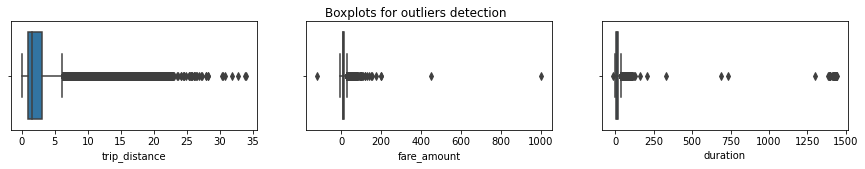

In [145]:
fig, axes = plt.subplots(1,3,figsize = (15,2))
plt.suptitle('Boxplots for outliers detection')
sns.boxplot(ax = axes[0], x = df0['trip_distance'])
sns.boxplot(ax = axes[1], x = df0['fare_amount'])
sns.boxplot(ax = axes[2], x = df0['duration']);

Podemos observar que las tres columnas contienen valores atípicos. Algunas son casos extremos mientras que otros no. En el caso de la distancia del viaje se puede llegar a aceptar que haya algún valor atípico excesivamente alto pues siempre puede haber un cliente que necesite realizar un viaje especialmente largo. En el caso de la columna `fare_amount` si que aparecen valores problemáticos. Hay tres valores que son claramente problemáticos, desde un valor negativo lo cual no se puede dar, hasta un valor que supera los 1000 dólares. Luego en cuanto a la columna `duration` los mayores valores podría entenderse como viajes muy largos pero claramente los viajes con tiempo menor de cero no tienen ningún sentido.

#### Valores atípicos `trip_distance`

In [146]:
df0['trip_distance'].describe()

count    22699.000000
mean         2.913313
std          3.653171
min          0.000000
25%          0.990000
50%          1.610000
75%          3.060000
max         33.960000
Name: trip_distance, dtype: float64

In [147]:
df0[df0['trip_distance'] > 30]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38,209.166667
5792,68023798,2,2017-08-11 14:14:01,2017-08-11 15:17:31,1,30.33,2,N,132,158,1,52.00,0.0,0.5,14.64,5.76,0.3,73.20,63.500000
6064,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06,67.483333
9280,51810714,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30,39.216667
10291,76319330,2,2017-09-11 11:41:04,2017-09-11 12:18:58,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80,37.900000
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21,60.150000
18130,90375786,1,2017-10-26 14:45:01,2017-10-26 16:12:49,1,30.50,1,N,132,220,1,90.50,0.0,0.5,19.85,8.16,0.3,119.31,87.800000


Solo hay 7 viajes que tengan una distancia mayor a 30 millas. Esto es perfectamente plausible en el contexto del dataset por lo que no van a suponer un problema en el análisis.

In [148]:
#Viajes con la menor distancia
sorted(set(df0['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

Las distancias se capturan con un alto grado de precisión. Sin embargo, podría ser posible que los viajes tuvieran distancias de cero si un pasajero pidiera un taxi y luego cambiara de opinión. Además, ¿hay suficientes valores cero en los datos como para plantear un problema?

In [149]:
print(sum(df0['trip_distance'] == 0))
print('Percentage of trips with a duration of 0 miles:', round((148/22699)*100, 2),'%')

148
Percentage of trips with a duration of 0 miles: 0.65 %


El porcentaje es tan bajo que no va a afectar a ningún modelo o predicción que hagamos por lo que podemos dejar esas filas o borrarlas. En nuestro caso vamos a dejarlas.

#### Valores atípicos `fare_amount`

In [150]:
df0['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

Los valores negativos son claramente un problema. Si un valor es negativo en esta columna significaría que el taxista ha pagado al cliente. Lo que vamos a hacer para solucionar esto es cambiar el todos los valores negativos que aparezcan en esta columna por cero. De esta manera no eliminamos filas.

In [151]:
#Cambiar los valores menores de 0 a 0
df0.loc[df0['fare_amount'] < 0, 'fare_amount'] = 0
df0['fare_amount'].describe()

count    22699.000000
mean        13.033832
std         13.212462
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

Ahora toca solucionar los valores excesivamente grandes. Está claro que el valor de 999 es un problema pues el percentil de 75% es de 14.5. Esto implica que hay una enorme distancia entre el final del rango intercuártilico y dicho valor. Para solucionarlo vamos a usar la siguiente función que he obtenido del curso de Google Advanced Data Analytics.

In [152]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df0.loc[df0[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df0[col].quantile(0.25)
        q3 = df0[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df0.loc[df0[col] > upper_threshold, col] = upper_threshold
        print(df0[col].describe())
        print()

Esta función calcula el cuartil 0.25 y el cuartil 0.75, o lo que es lo mismo, el percentil 25% y el 75%. Luego calcula el rango intercuartílco y finalmente te da el umbral superior y sustituye los valores mayores a este por el valor de dicho umbral. 

In [153]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



#### Valores atípicos `duration` 

In [154]:
df0['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

Aquí tenemos los mismos dos problemas que en el apartado anterior. La duración no puede ser menor que cero y el valor máximo es excesivamente alto por lo que vamos a tomar las mismas medidas que con la columna `fare_amount`.

In [155]:
df0.loc[df0['duration'] < 0, 'duration'] = 0
outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



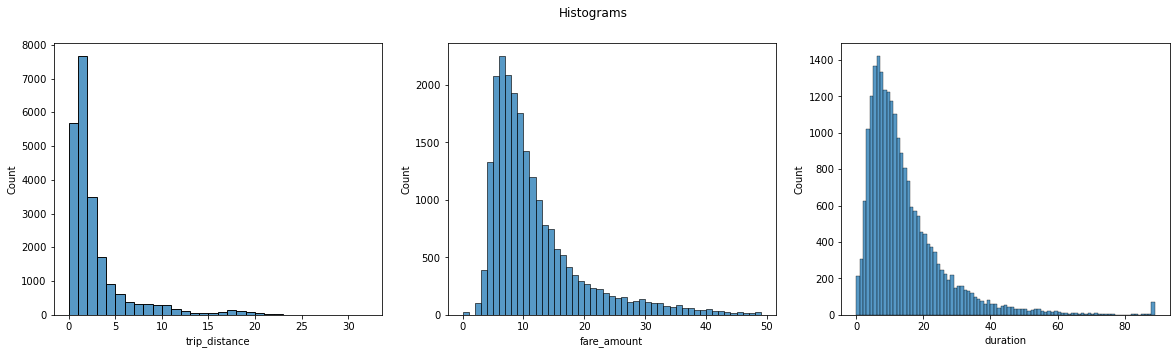

In [156]:
fig, axes = plt.subplots(1,3,figsize = (20,5))
plt.suptitle('Histograms')
sns.histplot(ax = axes[0], x = df0['trip_distance'], bins = range(0,33,1))
sns.histplot(ax = axes[1], x = df0['fare_amount'], bins = range(0, 50, 1))
sns.histplot(ax = axes[2], x = df0['duration'], bins = range(0,90,1));

### Estudio de las propinas dadas

Como uno de nuestro objetivos es crear un modelo que nos permita saber cuando un cliente va a dar buenas propinas y cuando no vamos a realizar un análisis de la columna `tip_amount`.

In [157]:
df0['tip_amount'].describe()

count    22699.000000
mean         1.835781
std          2.800626
min          0.000000
25%          0.000000
50%          1.350000
75%          2.450000
max        200.000000
Name: tip_amount, dtype: float64

In [158]:
sorted(set(df0['tip_amount']), reverse = True)[:10]

[200.0, 55.5, 51.64, 46.69, 42.29, 28.0, 25.2, 25.0, 22.22, 21.3]

Hay una gran diferencia entre el valor más grande en esta columna y el resto. Vamos a ver ese valor en mayor profundidad.

In [159]:
df0[df0['tip_amount'] == 200]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
8476,11157412,1,2017-02-06 05:50:10,2017-02-06 05:51:08,1,2.6,5,N,226,226,1,62.5,0.0,0.0,200.0,0.0,0.3,1200.29,0.966667


Esta fila tiene bastantes datos extraños. Es un viaje de 2.6 millas supuestamente. El viaje se realiza en 0.96 minutos lo cual es bastante extraño y el fare amount es 62.5 por lo que claramente ha sido uno de los valores atípicos que hemos modificado en esa columna. El `total_amount` es de 1200 dólares, un poco raro para un viaje de 2 millas que ha durado 0.96 minutos. Claramente esta fila tiene más datos erróneos que correctos por lo que lo más sensato sería eliminarla. 

In [160]:
#Eliminamos la fila
df0.drop(df0[(df0['tip_amount'] == 200)].index, inplace=True)

In [161]:
df0['tip_amount'].describe()

count    22698.000000
mean         1.827051
std          2.472576
min          0.000000
25%          0.000000
50%          1.350000
75%          2.450000
max         55.500000
Name: tip_amount, dtype: float64

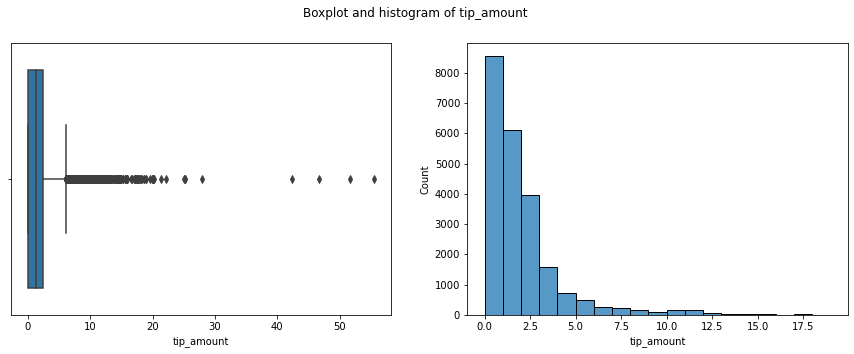

In [162]:
fig, axes = plt.subplots(1,2, figsize =(15,5))
plt.suptitle('Boxplot and histogram of tip_amount')
sns.boxplot(ax = axes[0], x = df0['tip_amount'])
sns.histplot(ax = axes[1], x = df0['tip_amount'], bins = range(0,20,1));

Se observa que claramente la mayoría de propinas se agrupan entre los 0 y los 3 doláres. En cuanto a los valores atípicos ya los hemos analizado concluyendo que esos valores de alrededor de 50 podrían llegar a ser plausibles.

#### Própinas por distribuidor

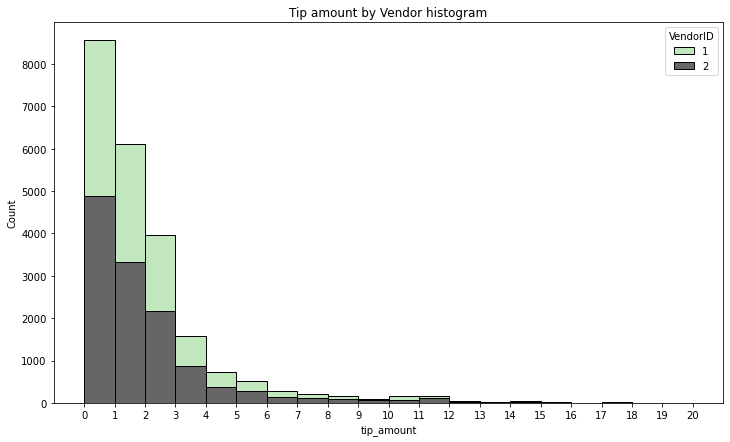

In [163]:
plt.figure(figsize = (12,7))
ax = sns.histplot(data = df0, x = 'tip_amount',bins = range(0,21,1),
                  hue = 'VendorID',
                  multiple = 'stack',
                 palette = 'Greens_d')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by Vendor histogram');

Si se separa el importe de las propinas por vendedor, se observa que no hay aberraciones notables en la distribución de las propinas entre los dos vendedores del conjunto de datos. El vendedor dos se lleva una parte ligeramente superior de los viajes, y esta proporción se mantiene aproximadamente para todos los importes de propina.

A continuación, nos centramos en el extremo superior del intervalo de propinas para comprobar si el vendedor uno recibe una parte notablemente mayor de las propinas más generosas.

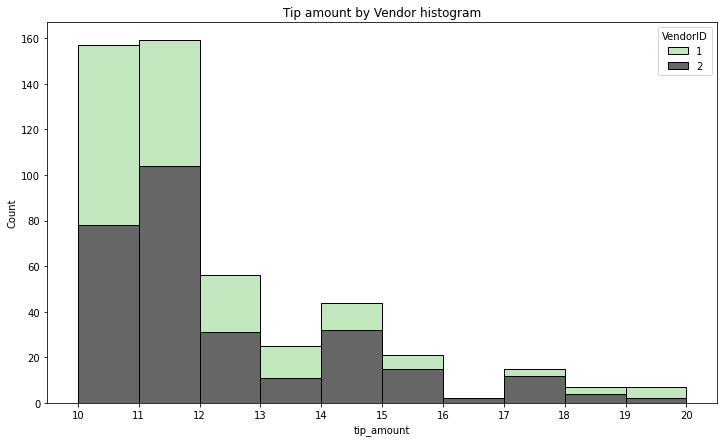

In [164]:
plt.figure(figsize = (12,7))
ax = sns.histplot(data = df0, x = 'tip_amount',bins = range(10,21,1),
                  hue = 'VendorID',
                  multiple = 'stack',
                 palette = 'Greens_d')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by Vendor histogram');

Las proporciones se mantienen incluso en estas cantidades de propina más altas, con la excepción del extremo más alto, pero esto no es digno de mención debido al bajo tamaño de la muestra en estas cantidades de propina.

Ahora vamos a analizar si hay alguna relación entre el número de pasajeros y la propina que dan.

In [165]:
df0['passenger_count'].value_counts()

1    16116
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

Casi dos tercios de los viajes son para un único pasajero aunque hay 1100 viajes con 5 pasajeros y 700 con hasta 6 pasajeros. Aparecen 33 viajes con cero pasajeros, estos viajes se van a borrar a no ser que se encuentre una explicación razonable para este valor.

In [166]:
mean_tips_by_passenger_count = df0.groupby(['passenger_count'])[['tip_amount']].mean()
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.836625
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


Podemos ver que el grupo que deja propinas más altas son los viajes con cero pasajeros. Viendo que hay tan solo 33 viajes con cero pasajeros y que no hay realmente una explicación para estos viajes sin pasajeros. Teniendo en cuenta que es la media más alta y que luego puede afectar al modelo que intentemos hacer para predecir las propinas que dará un cliente lo mejor sería eliminar estas 33 filas.

In [170]:
df0.drop(df0[(df0['passenger_count'] == 0)].index, inplace=True)

In [171]:
mean_tips_by_passenger_count = df0.groupby(['passenger_count'])[['tip_amount']].mean()
mean_tips_by_passenger_count

,tip_amount
passenger_count,
1,1.836625
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


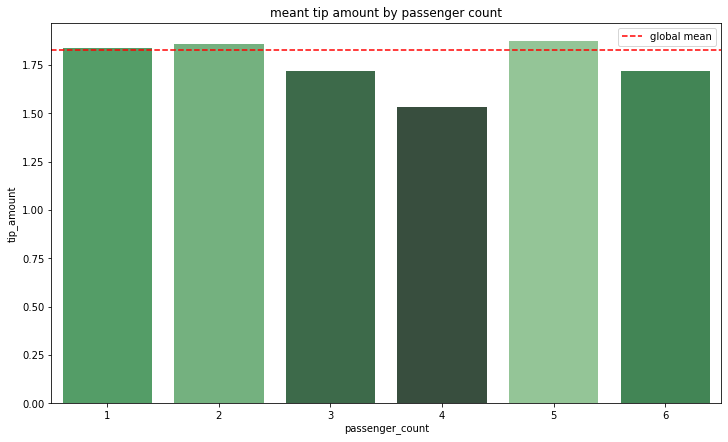

In [172]:
data = mean_tips_by_passenger_count
pal = sns.color_palette("Greens_d", len(data))
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize =(12,7))
ax = sns.barplot(x = data.index, y = data['tip_amount'],
                palette = np.array(pal[::-1])[rank])
ax.axhline(df0['tip_amount'].mean(), ls = '--', color = 'red', label = 'global mean')
ax.legend()
plt.title('meant tip amount by passenger count');

 El importe medio de las propinas varía muy poco en función del número de pasajeros. Aunque disminuye notablemente en los viajes con cuatro pasajeros, era de esperar que hubiera un mayor grado de fluctuación, ya que los viajes con cuatro pasajeros eran los menos abundantes en el conjunto de datos (aparte de los viajes con cero pasajeros).

#### Rides per month

In [193]:
#Create a month column
df0['month'] = df0['tpep_pickup_datetime'].dt.month_name()
#Create a day column
df0['day'] = df0['tpep_pickup_datetime'].dt.day_name()

In [194]:
#Get the total number of rides for each month
monthly_rides = df0['month'].value_counts()
monthly_rides

March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1768
September    1734
August       1724
July         1697
Name: month, dtype: int64

In [195]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'September', 'October', 'November', 'December']
monthly_rides = monthly_rides.reindex(index = month_order)
monthly_rides

January      1997
February     1768
March        2049
April        2019
May          2013
June         1964
July         1697
September    1734
October      2027
November     1843
December     1863
Name: month, dtype: int64

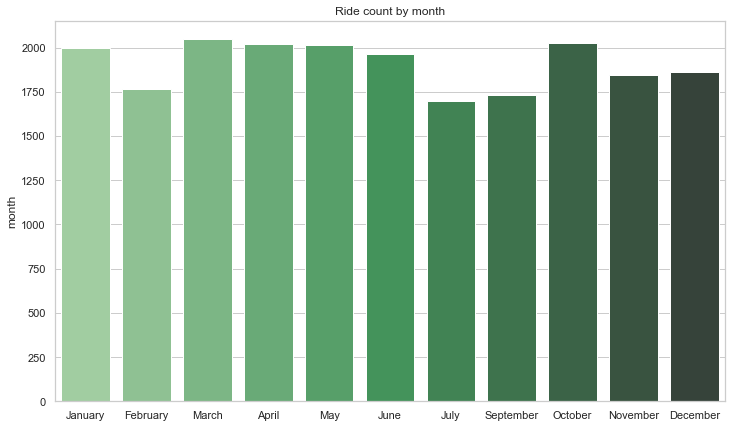

In [196]:
#Create a bar plot of total rides per month
plt.figure(figsize = (12,7))
pal = sns.color_palette("Greens_d", len(monthly_rides))
ax = sns.barplot(x = monthly_rides.index, y = monthly_rides, palette = pal)
ax.set_xticklabels(month_order)
plt.title('Ride count by month');

#### Rides per day

In [197]:
#Repeat the process, this time for days
daily_rides = df0['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index = day_order)
daily_rides

Monday       2930
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: day, dtype: int64

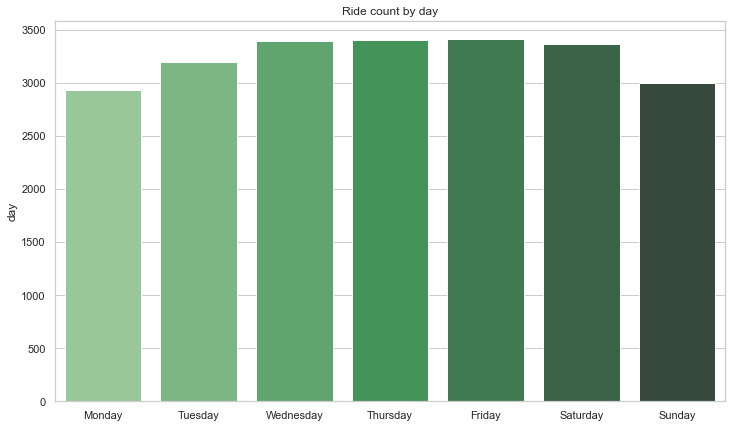

In [198]:
#Create a bar plot of total rides per day
plt.figure(figsize = (12,7))
pal = sns.color_palette("Greens_d", len(daily_rides))
ax = sns.barplot(x = daily_rides.index, y = daily_rides, palette = pal)
ax.set_xticklabels(day_order)
plt.title('Ride count by day');

#### Total revenue per day

In [199]:
#Repeat the process, this time for total revenue for day
total_amount_day = df0.groupby('day')[['total_amount']].sum()
total_amount_day = total_amount_day.reindex(index = day_order)
total_amount_day

,total_amount
day,
Monday,48374.08
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


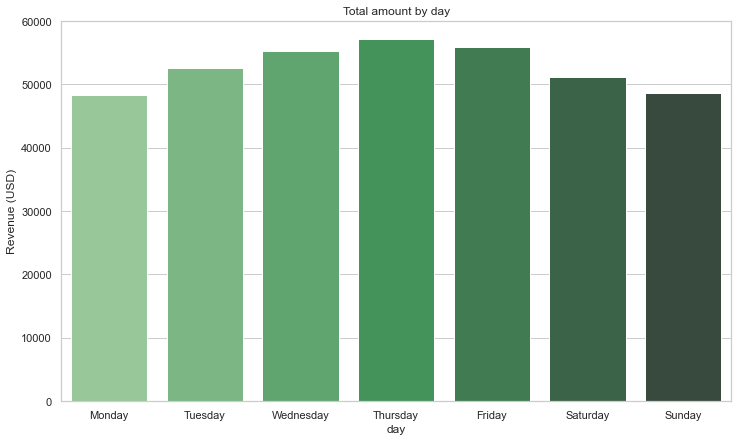

In [200]:
#Create a bar plot of total rides per day
plt.figure(figsize = (12,7))
pal = sns.color_palette("Greens_d", len(total_amount_day))
ax = sns.barplot(x = total_amount_day.index, y = total_amount_day['total_amount'], palette = pal)
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total amount by day');

#### Total revenue per month

In [201]:
#Repeat the process, this time for total revenue by month
total_amount_month = df0.groupby('month')[['total_amount']].sum()
total_amount_month = total_amount_month.reindex(index = month_order)
total_amount_month


,total_amount
month,
January,31735.25
February,27737.60
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
September,28206.38
October,33065.83


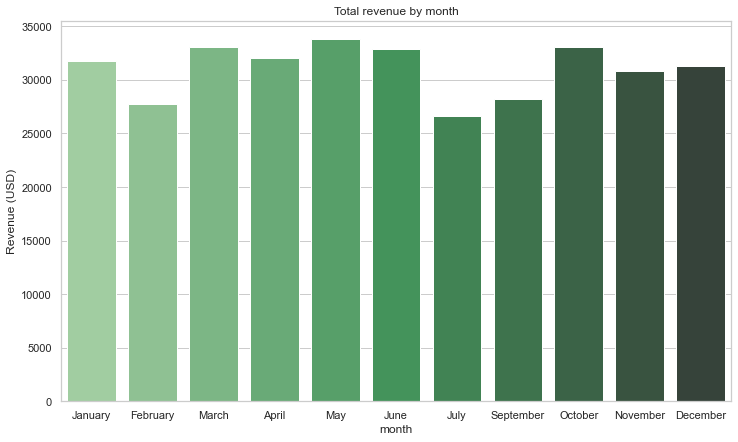

In [202]:
#bar plot
plt.figure(figsize = (12,7))
ax = sns.barplot(x = total_amount_month.index, y = total_amount_month['total_amount'], palette = 'Greens_d')
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by month');

In [203]:
#Create pickup_droppoff column
df0['pickup_dropoff'] = df0['PULocationID'].astype(str) + ' ' + df0['DOLocationID'].astype(str)
df0['pickup_dropoff'].head(3)

0    100 231
1     186 43
2    262 236
Name: pickup_dropoff, dtype: object

In [204]:
grouped = df0.groupby('pickup_dropoff')[['trip_distance']].mean(numeric_only = True)
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


In [205]:
grouped_dict = grouped.to_dict()

grouped_dict = grouped_dict['trip_distance']

In [206]:
df0['mean_distance'] = df0['pickup_dropoff']

df0['mean_distance'] = df0['mean_distance'].map(grouped_dict)

df0[(df0['PULocationID'] == 100) & (df0['DOLocationID'] == 231)][['mean_distance']]

,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


#### Create `mean_duration` column

In [207]:
grouped = df0.groupby('pickup_dropoff')[['duration']].mean(numeric_only = True)
grouped

grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df0['mean_duration'] = df0['pickup_dropoff']
df0['mean_duration'] = df0['mean_duration'].map(grouped_dict)

df0[(df0['PULocationID'] == 100) & (df0['DOLocationID'] == 231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


#### Create `rush_hour` column

In [208]:
df0['rush_hour'] = df0['tpep_pickup_datetime'].dt.hour

df0.loc[df0['day'].isin(['Saturday', 'Sunday']), 'rush_hour'] = 0

In [209]:
def rush_horizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else: 
        val = 0
    return val

In [210]:
df0.loc[(df0.day != 'Saturday') & (df0.day != 'Sunday'), 'rush_hour'] = df0.apply(rush_horizer, axis = 1)
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,month,day,pickup_dropoff,mean_distance,mean_duration,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,March,Saturday,100 231,3.521667,22.847222,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,April,Tuesday,186 43,3.108889,24.470370,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,December,Friday,262 236,0.881429,7.250000,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,May,Sunday,188 97,3.700000,30.250000,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,April,Saturday,4 112,4.435000,14.616667,0


In [211]:
df0['rush_hour'].value_counts()

0    15962
1     6736
Name: rush_hour, dtype: int64

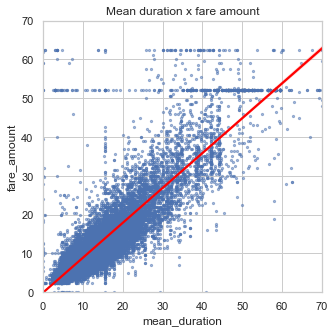

In [212]:
#Create a scatter plot to visualize the relationship between variables of interest
sns.set(style = 'whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x = df0['mean_duration'], y = df0['fare_amount'],
            scatter_kws = {'alpha':0.5, 's':5},
            line_kws = {'color':'red'})
plt.ylim(0,70)
plt.xlim(0,70)
plt.title('Mean duration x fare amount');

In [213]:
df0[df0['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
62.5     83
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

In [214]:
df0[df0['fare_amount'] > 50].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,month,day,pickup_dropoff,mean_distance,mean_duration,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,March,Sunday,236 132,19.211667,40.500000,0
21,85505540,2,2017-10-11 12:34:49,2017-10-11 13:22:38,1,12.30,5,N,138,265,1,62.5,0.0,0.0,12.00,16.26,0.3,96.81,47.816667,October,Wednesday,138 265,20.552000,39.376667,0
29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,1,62.5,0.5,0.5,18.56,11.52,0.3,111.38,88.783333,November,Monday,132 23,30.830000,88.783333,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,June,Saturday,132 163,19.229000,52.941667,0
156,104881101,1,2017-12-11 10:21:18,2017-12-11 11:14:57,1,15.60,1,N,138,88,1,51.5,0.0,0.5,11.60,5.76,0.3,69.66,53.650000,December,Monday,138 88,15.393333,64.316667,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,November,Saturday,132 132,2.255862,3.021839,0
174,53109134,1,2017-06-22 14:22:05,2017-06-22 16:07:28,1,16.90,1,N,230,219,2,62.5,0.0,0.5,0.00,0.00,0.3,72.30,88.783333,June,Thursday,230 219,16.900000,88.783333,0
176,50046493,2,2017-06-13 20:05:03,2017-06-13 20:42:53,1,18.05,3,N,163,1,2,62.5,0.5,0.0,0.00,10.50,0.3,80.80,37.833333,June,Tuesday,163 1,18.050000,37.833333,0
220,95620783,2,2017-11-11 13:39:55,2017-11-11 14:53:05,1,13.61,1,N,132,181,1,55.0,0.0,0.5,11.16,0.00,0.3,66.96,73.166667,November,Saturday,132 181,17.358571,42.697619,0
242,67332929,2,2017-08-09 08:32:09,2017-08-09 09:31:11,1,15.89,1,N,138,87,1,53.0,0.0,0.5,10.00,5.76,0.3,69.56,59.033333,August,Wednesday,138 87,13.812500,44.284722,1


#### Isolate modelling variables

In [215]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22698 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22698 non-null  int64         
 1   VendorID               22698 non-null  int64         
 2   tpep_pickup_datetime   22698 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22698 non-null  datetime64[ns]
 4   passenger_count        22698 non-null  int64         
 5   trip_distance          22698 non-null  float64       
 6   RatecodeID             22698 non-null  int64         
 7   store_and_fwd_flag     22698 non-null  object        
 8   PULocationID           22698 non-null  int64         
 9   DOLocationID           22698 non-null  int64         
 10  payment_type           22698 non-null  int64         
 11  fare_amount            22698 non-null  float64       
 12  extra                  22698 non-null  float64       
 13  m

In [216]:
df1 = df0.copy()

df1 = df1.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'], axis = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22698 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22698 non-null  int64  
 1   passenger_count  22698 non-null  int64  
 2   fare_amount      22698 non-null  float64
 3   mean_distance    22698 non-null  float64
 4   mean_duration    22698 non-null  float64
 5   rush_hour        22698 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.7 MB


In [217]:
df1.head(10)

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
0,2,6,13.0,3.521667,22.847222,0
1,1,1,16.0,3.108889,24.470370,0
2,1,1,6.5,0.881429,7.250000,1
3,2,1,20.5,3.700000,30.250000,0
4,2,1,16.5,4.435000,14.616667,0
5,2,6,9.0,2.052258,11.855376,0
6,2,1,47.5,12.830000,59.633333,1
7,2,1,16.0,4.022500,26.437500,1
8,2,1,9.0,1.019259,7.873457,0
9,1,1,13.0,1.580000,10.541111,0


#### Pair plot

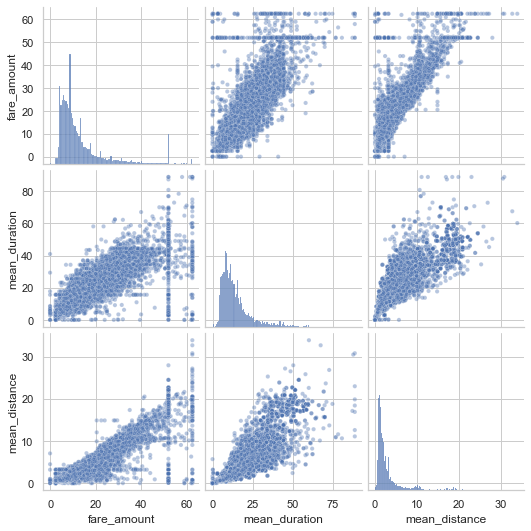

In [218]:
sns.pairplot(df1[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws = {'alpha':0.4, 'size':5});

#### Identify correlations

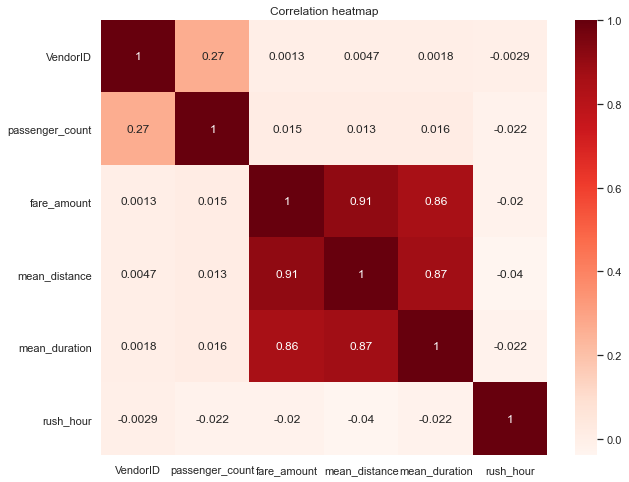

In [219]:
#Create a correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(method = 'pearson'), annot = True, cmap = 'Reds')
plt.title('Correlation heatmap');

#### Split data into outcome variable and features

In [220]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22698 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22698 non-null  int64  
 1   passenger_count  22698 non-null  int64  
 2   fare_amount      22698 non-null  float64
 3   mean_distance    22698 non-null  float64
 4   mean_duration    22698 non-null  float64
 5   rush_hour        22698 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.7 MB


In [221]:
#Set the X and y variables
X = df1.drop(columns=['fare_amount'])

y = df1[['fare_amount']]

X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


#### Pre-process data

In [222]:
X['VendorID'] = X['VendorID'].astype(str)

X = pd.get_dummies(X, drop_first= True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


In [223]:
#Create training and testing sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [224]:
#Standarize the X variable
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_Train_scaled', X_train_scaled)

X_Train_scaled [[-0.50009796  0.86324317  0.17440312 -0.65041583  0.89131705]
 [-0.50009796 -0.60014874 -0.69886017  1.53747795  0.89131705]
 [-0.50009796 -0.6165769  -0.92641125 -0.65041583 -1.12193522]
 ...
 [-0.50009796 -0.51620798 -0.74217315  1.53747795 -1.12193522]
 [ 0.27504321 -0.6044572  -0.95805142 -0.65041583  0.89131705]
 [ 1.82532554  0.83065113  1.12904647 -0.65041583  0.89131705]]


In [225]:
#fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [226]:
#Train data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8488052091319851
R^2: 0.8488052091319851
MAE: 2.1656641943039814
MSE: 16.91517180463811
RMSE: 4.112805831137438


In [227]:
#Test the data
X_test_scaled = scaler.transform(X_test)

In [228]:
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.83706161345431
R^2: 0.83706161345431
MAE: 2.1798794118492726
MSE: 17.52054885237039
RMSE: 4.185755469729496


In [229]:
X_scaled = scaler.transform(X)
r_sq_test = lr.score(X_scaled, y)
print('Coefficient of determination:', r_sq_test)
y_pred_total = lr.predict(X_scaled)
print('R^2:', r2_score(y, y_pred_total))
print('MAE:', mean_absolute_error(y, y_pred_total))
print('MSE:', mean_squared_error(y, y_pred_total))
print('RMSE:', np.sqrt(mean_squared_error(y, y_pred_total)))

Coefficient of determination: 0.8465301189878784
R^2: 0.8465301189878784
MAE: 2.168507488323526
MSE: 17.036257882561475
RMSE: 4.127500197766376


#### Results

In [230]:
#Create a results dataframe
results = pd.DataFrame(data = {'actual':y_test['fare_amount'],
                               'predicted': y_pred_test.ravel(),})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.349796,1.650204
18134,28.0,16.322276,11.677724
4655,5.5,6.703537,-1.203537
7378,15.5,16.228030,-0.728030
19027,42.0,36.616486,5.383514


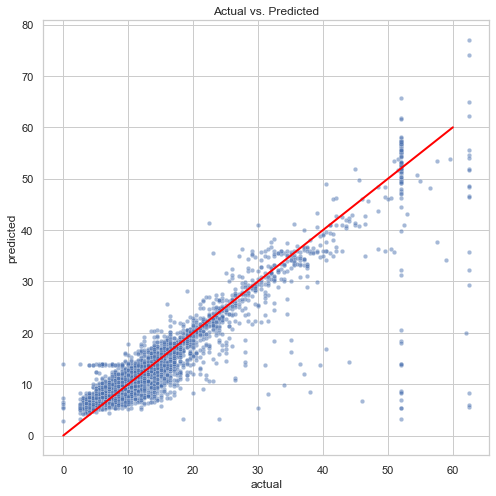

In [231]:
#Create a scatterplot to visualize predicted over actual
fig, ax = plt.subplots(figsize = (8,8))
sns.set(style = 'whitegrid')
sns.scatterplot(x = 'actual',
                y = 'predicted',
                data = results,
                s = 20,
                alpha = 0.5,
                ax = ax)
plt.plot([0,60],[0,60], c = 'red', linewidth = 2)
plt.title('Actual vs. Predicted');

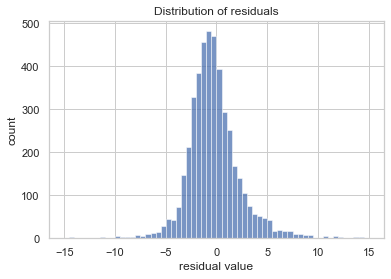

In [232]:
#Visualize the distribution of residulas
sns.histplot(results['residual'], bins = np.arange(-15.0,15.5,0.5))
plt.title('Distribution of residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [233]:
#residual mean
results['residual'].mean()

0.03402985446490014

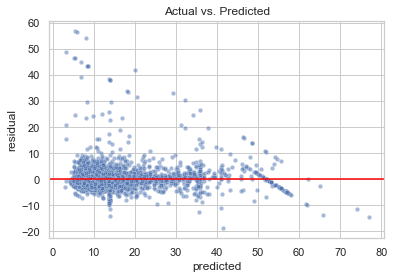

In [234]:
#Create a scatterplot of residuals over predicted
sns.set(style = 'whitegrid')
sns.scatterplot(x = 'predicted',
                y = 'residual',
                data = results,
                s = 20,
                alpha = 0.5)
plt.axhline(0, c = 'red')
plt.title('Actual vs. Predicted');

In [235]:
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.027462,7.174878,2.829151,0.11905,-0.041875


### Hypothesis Test

**Note:** In the dataset, `payment_type` is encoded in integers:
*   1: Credit card
*   2: Cash
*   3: No charge
*   4: Dispute
*   5: Unknown



In [236]:
df0.groupby('payment_type')[['fare_amount']].mean()

,fare_amount
payment_type,
1,13.275956
2,12.105683
3,12.343140
4,12.989130


$H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

$H_A$: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.

You choose 5% as the significance level and proceed with a two-sample t-test.

In [237]:
#hypothesis A/B test

credit_card = df0[df0['payment_type'] == 1]['fare_amount']
cash = df0[df0['payment_type'] == 2]['fare_amount']
stats.ttest_ind(a = credit_card, b = cash, equal_var=False)

Ttest_indResult(statistic=7.975947603846438, pvalue=1.6208506504759777e-15)